In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("../data/interim/train_selected.csv")

In [3]:
X_test = pd.read_csv("../data/interim/test_selected.csv")

In [4]:
y_train = pd.read_csv("../data/interim/y_train.csv")
y_test = pd.read_csv("../data/interim/y_test.csv")

In [5]:
X_train.head()

,OverallQual,GrLivArea_capped,GarageCars,TotalBsmtSF_capped,GarageArea_capped,1stFlrSF_capped,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,BsmtQual,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageType_NoNull
0,5,1314.0,1,1314.0,294.0,1314.0,1,5,1957,1957,...,TA,No,TA,GasA,TA,Y,TA,NaN,RFn,Attchd
1,6,1571.0,2,799.0,380.0,799.0,2,7,1993,1994,...,Gd,No,Gd,GasA,Gd,Y,TA,TA,RFn,Attchd
2,5,796.0,0,796.0,0.0,796.0,1,4,1910,1950,...,Fa,No,Fa,GasA,Gd,Y,TA,NaN,NoGarage,NaN
3,5,1768.0,1,731.0,240.0,981.0,1,7,1937,1950,...,Gd,No,Gd,GasA,Ex,Y,Gd,TA,Unf,Detchd
4,5,1691.0,1,1026.0,308.0,1026.0,2,6,1924,1950,...,TA,No,TA,GasA,TA,Y,Gd,Gd,Unf,Detchd


In [6]:
X_train.shape

(1168, 46)

In [7]:
y_train

,SalePrice
0,145000
1,178000
2,85000
3,175000
4,127000
...,...
1163,176432
1164,135000
1165,115000
1166,189950


# 1. Univariate Analysis

In [8]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [9]:
# Summary statistics for all numerical columns
num_summary = X_train[numerical_cols].describe().transpose()
print(num_summary)

                     count          mean          std     min      25%  \
OverallQual         1168.0      6.121575     1.367619     1.0     5.00   
GrLivArea_capped    1168.0   1516.583732   481.400289   334.0  1145.75   
GarageCars          1168.0      1.781678     0.740161     0.0     1.00   
TotalBsmtSF_capped  1168.0   1054.595137   402.616767     0.0   796.00   
GarageArea_capped   1168.0    475.045732   207.183081     0.0   341.00   
1stFlrSF_capped     1168.0   1163.456713   360.603035   334.0   888.00   
FullBath            1168.0      1.577055     0.546912     0.0     1.00   
TotRmsAbvGrd        1168.0      6.561644     1.619706     2.0     5.00   
YearBuilt           1168.0   1970.965753    30.675495  1872.0  1953.00   
YearRemodAdd        1168.0   1984.897260    20.733955  1950.0  1966.00   
MasVnrArea_NoNull   1168.0    103.238870   172.746354     0.0     0.00   
Fireplaces          1168.0      0.618151     0.645129     0.0     0.00   
LotArea_capped      1168.0  10126.5058

/tmp/ipykernel_4630/874205407.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 5))


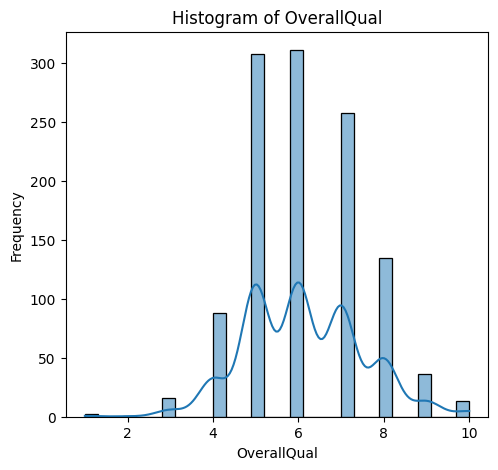

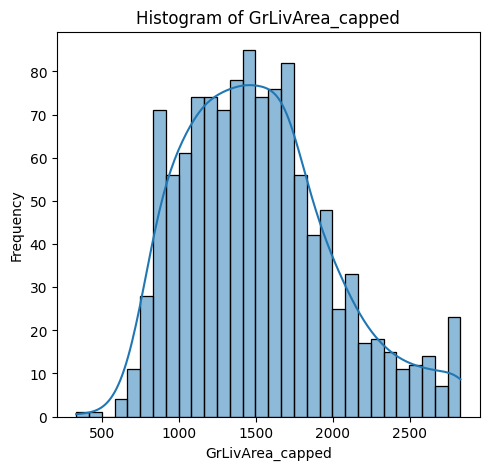

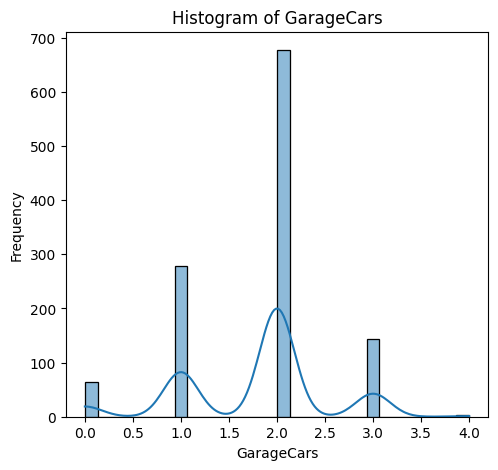

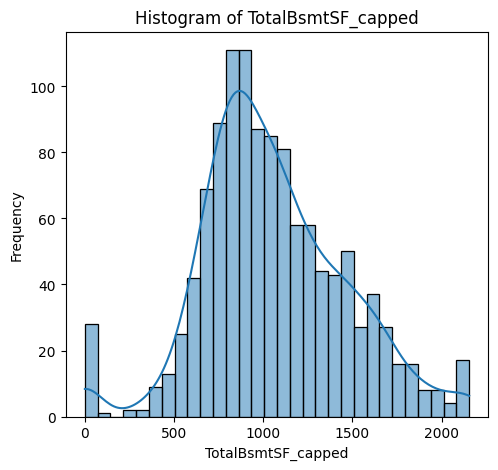

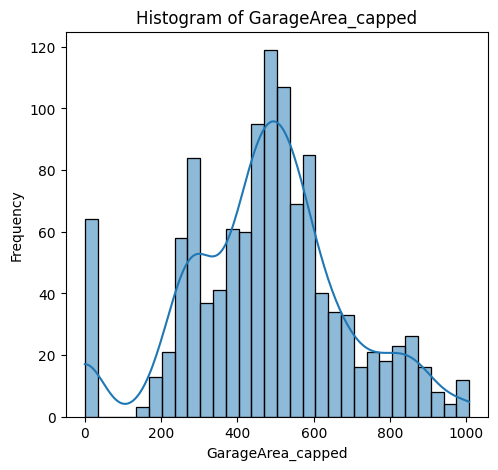

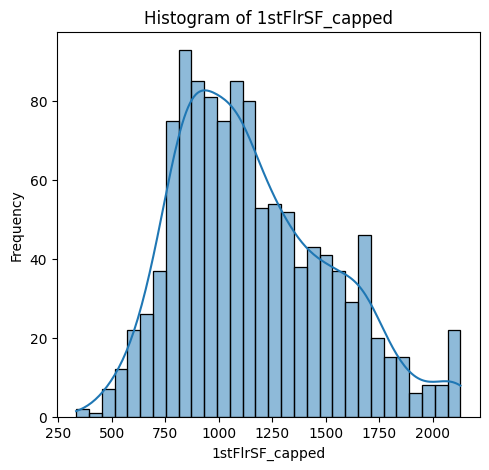

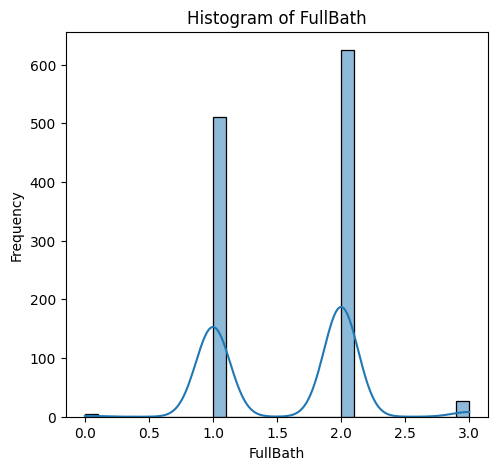

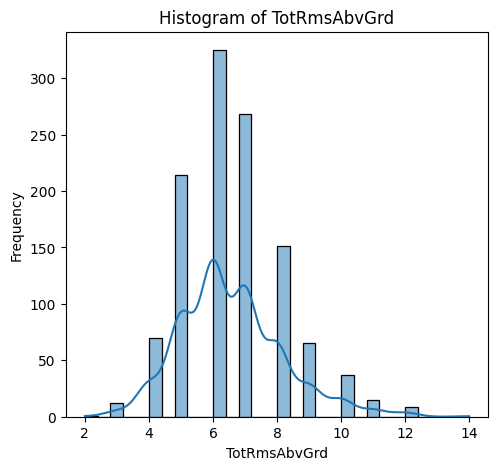

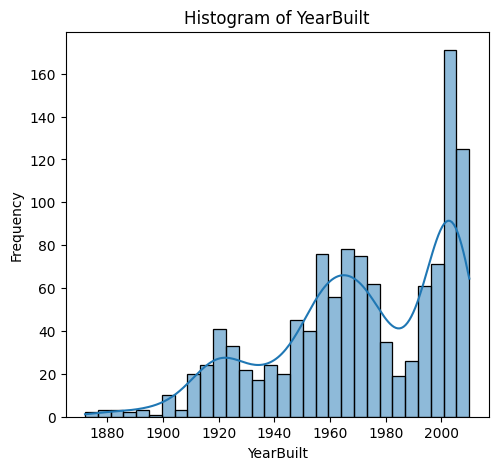

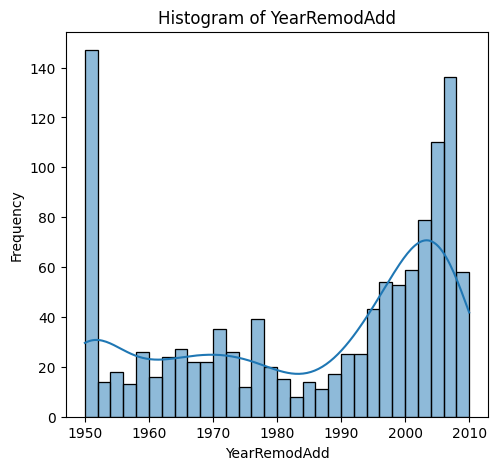

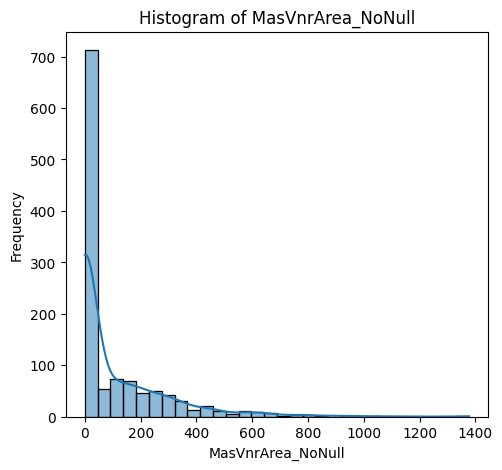

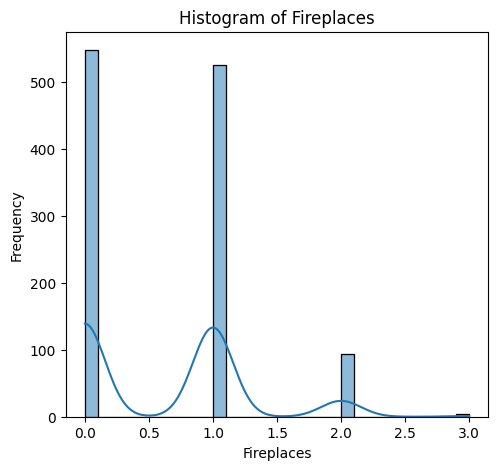

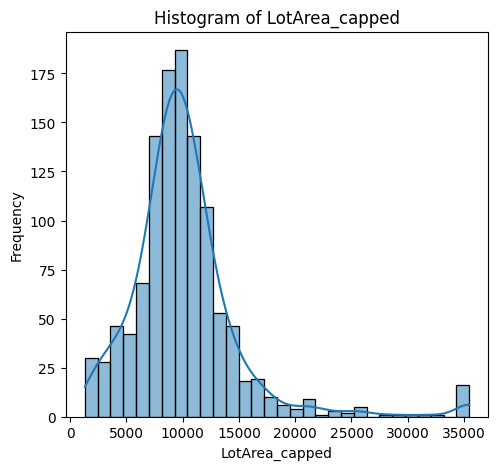

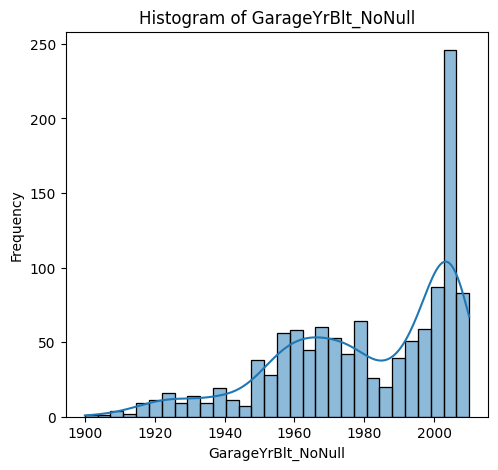

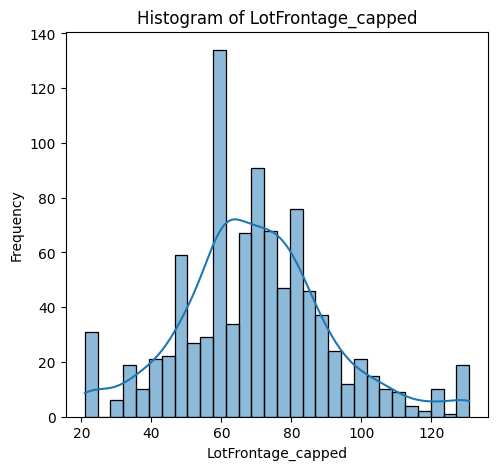

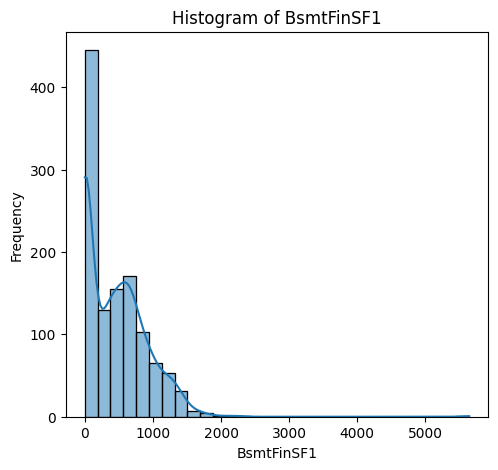

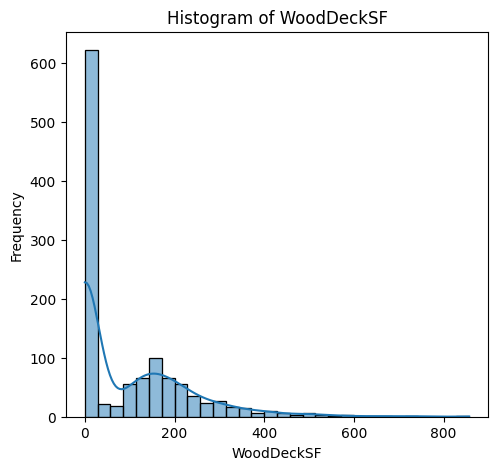

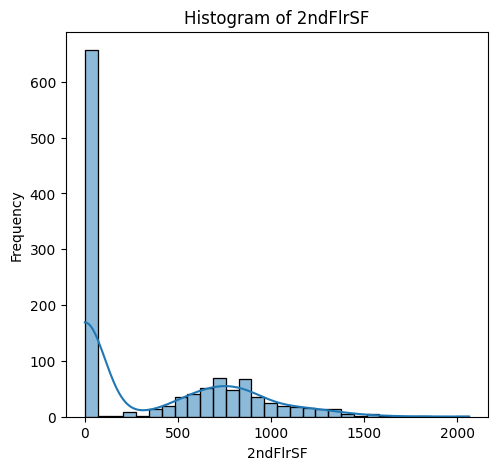

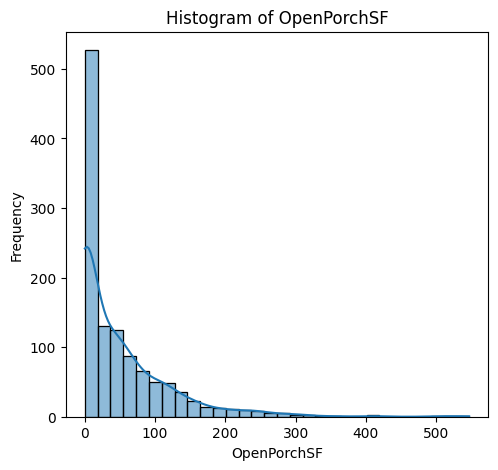

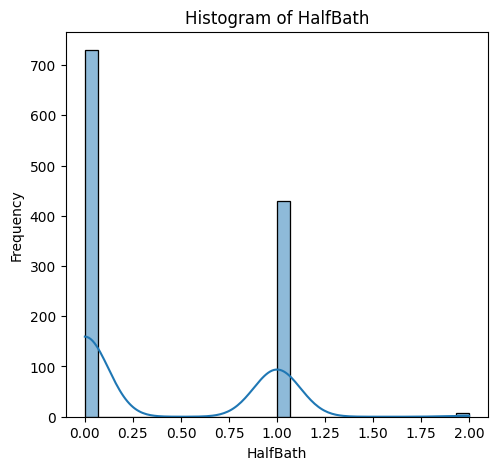

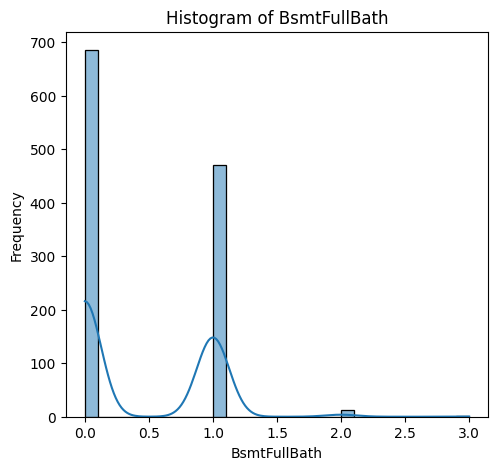

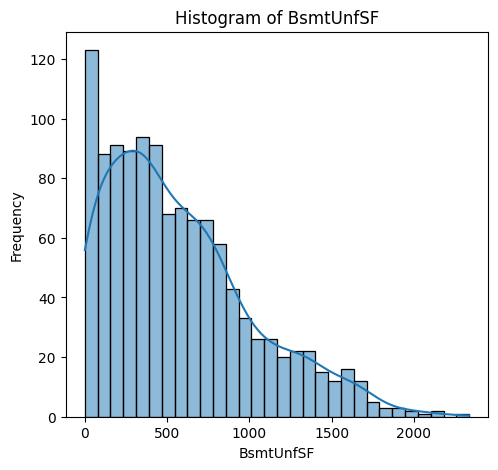

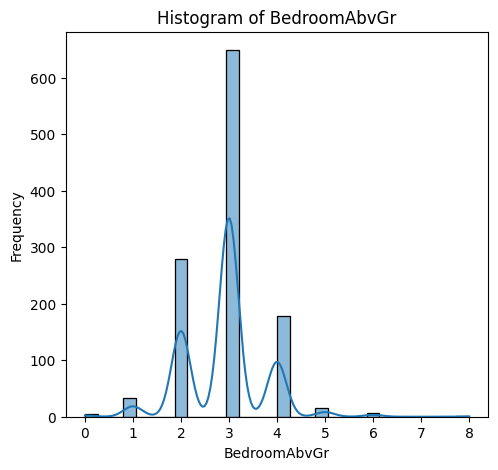

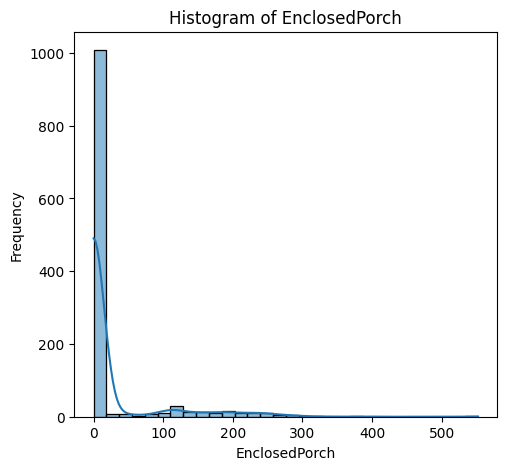

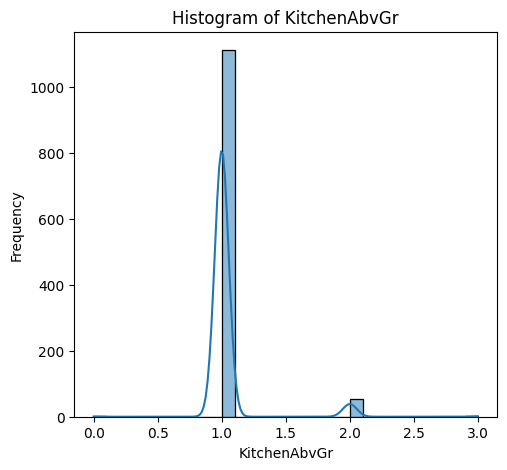

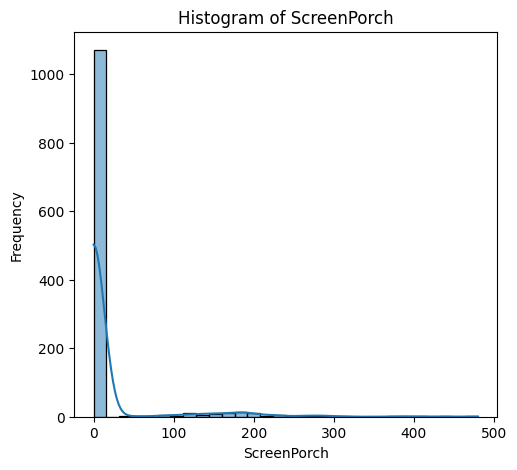

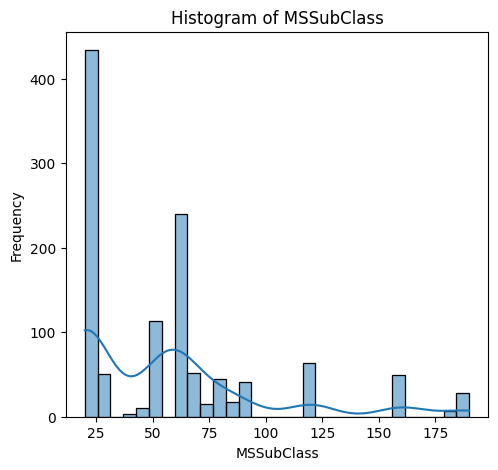

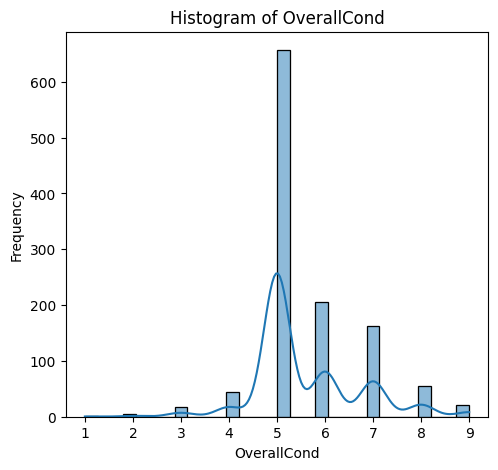

In [ ]:
# Plots: Loop through each numerical column
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram with KDE (Kernel Density Estimate)
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], kde=True, bins=30)  # Adjust bins if needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

In [12]:
# Value counts for all categorical columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(X_train[col].value_counts(normalize=True))  # Normalized shows percentages



Value counts for MSZoning:
MSZoning
RL    0.791096
RM    0.147260
FV    0.045377
RH    0.012842
C     0.003425
Name: proportion, dtype: float64

Value counts for Street:
Street
Pave    0.996575
Grvl    0.003425
Name: proportion, dtype: float64

Value counts for LotShape:
LotShape
Reg    0.624144
IR1    0.337329
IR2    0.031678
IR3    0.006849
Name: proportion, dtype: float64

Value counts for LandSlope:
LandSlope
Gtl    0.948630
Mod    0.043664
Sev    0.007705
Name: proportion, dtype: float64

Value counts for Neighborhood:
Neighborhood
NAmes      0.154966
CollgCr    0.098459
OldTown    0.077911
Edwards    0.074486
Somerst    0.059075
NWAmes     0.056507
Gilbert    0.055651
NridgHt    0.052226
Sawyer     0.049658
BrkSide    0.038527
Crawfor    0.037671
SawyerW    0.037671
Mitchel    0.034247
NoRidge    0.028253
Timber     0.023973
IDOTRR     0.022260
SWISU      0.017979
StoneBr    0.017123
ClearCr    0.016267
Blmngtn    0.012842
BrDale     0.011130
MeadowV    0.008562
Veenker    0.007

In [14]:
# based on this, I'm dropping high imbalance column
X_train = X_train.drop(['Street', 'MSZoning', 'LandSlope', 'Heating', 'CentralAir'], axis= 1, inplace= True)

In [ ]:

# Plots: Loop through each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=X_train[col], order=X_train[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels if categories are many/long
    plt.show()  # Or save: plt.savefig(f'{col}_cat_plot.png')